# Creating Data

In [30]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [31]:
train_labels = []
train_samples = []

In [32]:
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [33]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [34]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [35]:
scaled_train_samples

array([[0.31034483],
       [0.89655172],
       [0.74712644],
       ...,
       [0.89655172],
       [0.44827586],
       [0.73563218]])

# Sequential Model

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [37]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer=Adam(learning_rate=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
210/210 - 0s - loss: 0.6963 - accuracy: 0.4652
Epoch 2/30
210/210 - 0s - loss: 0.6723 - accuracy: 0.5714
Epoch 3/30
210/210 - 0s - loss: 0.6466 - accuracy: 0.6486
Epoch 4/30
210/210 - 0s - loss: 0.6243 - accuracy: 0.7029
Epoch 5/30
210/210 - 0s - loss: 0.6010 - accuracy: 0.7252
Epoch 6/30
210/210 - 0s - loss: 0.5763 - accuracy: 0.7495
Epoch 7/30
210/210 - 0s - loss: 0.5504 - accuracy: 0.7771
Epoch 8/30
210/210 - 0s - loss: 0.5227 - accuracy: 0.8081
Epoch 9/30
210/210 - 0s - loss: 0.4925 - accuracy: 0.8281
Epoch 10/30
210/210 - 0s - loss: 0.4625 - accuracy: 0.8533
Epoch 11/30
210/210 - 0s - loss: 0.4352 - accuracy: 0.8700
Epoch 12/30
210/210 - 0s - loss: 0.4104 - accuracy: 0.8814
Epoch 13/30
210/210 - 0s - loss: 0.3883 - accuracy: 0.8848
Epoch 14/30
210/210 - 0s - loss: 0.3694 - accuracy: 0.8938
Epoch 15/30
210/210 - 0s - loss: 0.3531 - accuracy: 0.8990
Epoch 16/30
210/210 - 0s - loss: 0.3388 - accuracy: 0.9110
Epoch 17/30
210/210 - 0s - loss: 0.3270 - accuracy: 0.9024
Epoch 

In [41]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [42]:
model2.compile(optimizer=Adam(learning_rate=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
model2.fit(x=scaled_train_samples, y=train_labels, validation_split=.1, batch_size=10, epochs=30, shuffle=True, verbose=2)
# Seperating validation data

Epoch 1/30
189/189 - 0s - loss: 0.6815 - accuracy: 0.5852 - val_loss: 0.6547 - val_accuracy: 0.6810
Epoch 2/30
189/189 - 0s - loss: 0.6506 - accuracy: 0.6471 - val_loss: 0.6160 - val_accuracy: 0.7286
Epoch 3/30
189/189 - 0s - loss: 0.6219 - accuracy: 0.6862 - val_loss: 0.5815 - val_accuracy: 0.7571
Epoch 4/30
189/189 - 0s - loss: 0.5938 - accuracy: 0.7275 - val_loss: 0.5486 - val_accuracy: 0.7810
Epoch 5/30
189/189 - 0s - loss: 0.5662 - accuracy: 0.7524 - val_loss: 0.5206 - val_accuracy: 0.8190
Epoch 6/30
189/189 - 0s - loss: 0.5395 - accuracy: 0.7857 - val_loss: 0.4912 - val_accuracy: 0.8238
Epoch 7/30
189/189 - 0s - loss: 0.5134 - accuracy: 0.8032 - val_loss: 0.4650 - val_accuracy: 0.8667
Epoch 8/30
189/189 - 0s - loss: 0.4880 - accuracy: 0.8307 - val_loss: 0.4409 - val_accuracy: 0.8905
Epoch 9/30
189/189 - 0s - loss: 0.4633 - accuracy: 0.8429 - val_loss: 0.4156 - val_accuracy: 0.8952
Epoch 10/30
189/189 - 0s - loss: 0.4398 - accuracy: 0.8608 - val_loss: 0.3940 - val_accuracy: 0.9048

# Creating Test Data

In [61]:
test_labels = []
test_samples = []

In [62]:
for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [63]:
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [64]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

# Predict

In [65]:
predictions = model2.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [66]:
for i in predictions:
    print(i)

[0.9326789  0.06732117]
[0.12721154 0.8727884 ]
[0.05609027 0.94390976]
[0.94699234 0.05300769]
[0.06311792 0.9368821 ]
[0.29109767 0.70890236]
[0.02550525 0.97449476]
[0.9409095  0.05909053]
[0.21780948 0.78219056]
[0.9448795  0.05512056]
[0.9452756  0.05472443]
[0.34725815 0.65274185]
[0.9389929 0.0610071]
[0.028399 0.971601]
[0.07989804 0.92010194]
[0.03161045 0.9683896 ]
[0.04980354 0.95019644]
[0.01484324 0.9851568 ]
[0.9469923  0.05300769]
[0.9433772  0.05662283]
[0.94598854 0.05401148]
[0.31851897 0.68148106]
[0.9448795  0.05512056]
[0.028399 0.971601]
[0.9465932  0.05340679]
[0.660072   0.33992797]
[0.40801725 0.5919827 ]
[0.08994882 0.91005117]
[0.63044864 0.36955133]
[0.07095992 0.92904013]
[0.08994882 0.91005117]
[0.17691016 0.82308984]
[0.1011249 0.8988751]
[0.01208414 0.9879159 ]
[0.12721154 0.8727884 ]
[0.93580776 0.06419221]
[0.94215566 0.05784434]
[0.9438708  0.05612919]
[0.028399 0.971601]
[0.08994882 0.91005117]
[0.01844458 0.9815554 ]
[0.02550525 0.97449476]
[0.93963

In [67]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [68]:
for i in rounded_predictions:
    print(i)

0
1
1
0
1
1
1
0
1
0
0
1
0
1
1
1
1
1
0
0
0
1
0
1
0
0
1
1
0
1
1
1
1
1
1
0
0
0
1
1
1
1
0
0
0
0
0
0
0
0
1
0
0
0
1
1
1
1
0
0
1
0
0
0
1
0
0
0
1
0
1
1
1
0
1
0
0
1
1
0
0
0
1
0
1
1
1
1
1
1
0
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
1
1
0
0
0
1
0
0
0
0
0
1
1
0
0
0
0
0
1
1
1
0
1
0
1
0
1
1
0
1
0
0
1
1
0
1
0
1
1
1
1
1
0
0
0
1
1
1
1
0
0
1
0
0
0
1
0
1
0
1
0
1
0
1
0
1
0
0
1
0
1
1
0
1
1
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
0
1
1
1
1
0
0
1
1
0
1
1
1
1
1
1
1
0
0
1
1
0
0
1
1
0
1
1
0
0
0
0
0
1
0
1
0
0
1
1
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
1
1
0
0
0
1
0
1
1
0
0
0
0
0
1
1
1
0
0
1
0
0
1
0
0
1
0
0
0
1
1
1
1
0
0
0
0
0
1
1
0
0
0
1
1
0
1
1
1
0
0
1
1
0
1
0
1
1
1
0
0
1
1
0
0
1
0
1
1
0
0
1
1
0
1
0
1
0
1
0
1
1
1
1
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
1
1
1
1
0
0
0
0
1
0
1
0
0
1
1
1
0
0
1
1
0
0
1
1
0
0
1
1
0
1
0
1
1
1
0
1
1
0
0
1
0
1
1
1
0
0
1
1
0
1
1
1
1
1
1
1
0
1


# Confusion Matrix

In [69]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [70]:
cm =  confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [71]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], 
                 horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    

[[199  11]
 [ 10 200]]


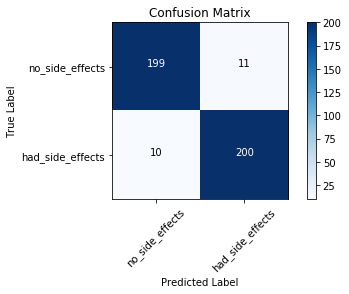

In [72]:
cm_plot_labels=['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)

# Save and Load a Model

In [74]:
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

In [75]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [76]:
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [77]:
new_model.get_weights()

[array([[-0.1616961 , -0.29105878,  0.43936232,  0.40426993, -0.37162292,
          0.4311419 , -0.2115897 , -0.35249603, -0.5067647 ,  0.00349749,
         -0.02508676, -0.13264284, -0.24789432, -0.41976738,  0.35286772,
          0.70958567]], dtype=float32),
 array([ 0.        ,  0.        , -0.09558019, -0.11413409,  0.        ,
        -0.12216934,  0.        ,  0.        ,  0.        ,  0.27723825,
         0.        ,  0.        ,  0.        ,  0.        , -0.06348088,
        -0.14295043], dtype=float32),
 array([[-0.04925844,  0.08872458, -0.2648513 ,  0.23567   , -0.26562285,
         -0.34605065,  0.2627038 ,  0.10429481, -0.33247146,  0.25994614,
         -0.11571755, -0.04491025, -0.3430905 ,  0.09421211, -0.06706735,
          0.1180765 ,  0.23731223, -0.30746335, -0.049593  , -0.06899515,
         -0.03419778,  0.19164541,  0.25171992,  0.05099222, -0.2685914 ,
          0.12351978, -0.28295463, -0.24410105,  0.33759263, -0.03741038,
          0.31587216, -0.21596129],
 

In [78]:
new_model.optimizer

##### model.to_json()

Just model architecture

In [83]:
json_string = model2.to_json()

In [84]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_4", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_12_input"}}, {"class_name": "Dense", "config": {"name": "dense_12", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_13", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null

In [85]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [86]:
model_architecture.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_13 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
